In [81]:
#reading cleaned dataset
import pandas as pd
csv = './clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()
#removing duplicate values
my_df = my_df.drop_duplicates(subset='clean_text', keep='first')


In [82]:
#grouping the results by companies to understand if we have similar number of tweets for each company
my_df[['clean_text', 'pre_clean_len']].groupby(my_df['company']).agg(['mean', 'count'])

pre_clean_len       
                              mean  count
company                                  
AT&T                    156.869780  80510
Alphabet (class A,C)    125.000000      2
Amazon                  195.056790  94225
Apple                   175.179363  77229
Bank of America         190.942122   2177
CVS                     164.099351  30971
Campbell Soup           162.425614    773
Citigroup               176.751078   5564
Coca-Cola               148.060998  63379
Colgate-Palmolive       161.840665  13594
Costco                  154.717929  43645
Darden Restaurants      180.740964    166
Dell                    175.679759  36307
Dollar General          196.414487    497
Dollar tree             184.609971    682
Facebook                185.591563  83391
General Mills           147.958225    383
HP                      173.400683  43311
Hershey                 163.073867  17491
Home Depot              173.339923   2074
J & J                   166.045233  41651
JPMorgan & Chase        193.845652   2760
Kellog                  151.107317    205
Kohl's                  129.595138  56649
Kraft Heinz             171.329584    889
Kroger                  160.981782  24207
Lowes                   167.006362  24048
Macy's                  144.806370  60249
Molson Coors            178.577049    305
Monster Beverage        212.056000    125
Nordstrom               176.958751  27128
P&G                     150.089651  51243
PNC Financial           158.686684    383
Ralph Lauren            160.603239   1482
Ross                    147.534132  22384
Smucker                 166.071111    225
Snap Inc.               143.564000   1500
Spotify                 190.448665  66203
Sprint                  196.885254  11861
T-Mobile                112.782919  27211
TJX                     155.552651   1339
Target                  160.083169  48672
Truist                  166.943218    634
Twitter                 174.231674  88141
Tyson Foods             181.355556    675
Uber                    169.715839  59857
Verizon                 168.572643  42709
Walgreens               160.786194  22614
Walmart                 171.015384  49532
Wells Fargo             134.299414   1366

# Generating sentiment from text

In [83]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


In [84]:
number_favourites = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [85]:
my_df["clean_text"] = my_df["clean_text"].apply(str) 
my_df.reset_index(drop=True,inplace=True)

In [86]:
for i in range(0, len(my_df["clean_text"])):
    vs_compound.append(analyzer.polarity_scores(my_df["clean_text"][i])['compound'])
    vs_pos.append(analyzer.polarity_scores(my_df["clean_text"][i])['pos'])
    vs_neu.append(analyzer.polarity_scores(my_df["clean_text"][i])['neu'])
    vs_neg.append(analyzer.polarity_scores(my_df["clean_text"][i])['neg'])

In [87]:
my_df["overall_sentiment"] = vs_compound

In [80]:
len(my_df)

1340169

In [88]:
my_df["positive_sentiment"] = vs_pos

In [89]:
my_df["neutral_sentiment"] = vs_neu

In [91]:
my_df["negative_sentiment"] = vs_neg

In [92]:
my_df

,index,company,tweet_text,date,hashtags,retweets,favorites,pre_clean_len,clean_text,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,8387,Truist,"..now, let me go a step further.Did u show dis...",2017-01-14 17:16:28+00:00,#truist,0.0,0.0,108,now let me go step further did show disdain at...,-0.4767,0.000,0.829,0.171
1,8388,Truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,107,tryna get that official league license so can ...,0.0000,0.000,1.000,0.000
2,8389,Truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25 07:25:40+00:00,#TRUIST,1.0,2.0,45,showing up with some goods too hmu truist,0.0000,0.000,1.000,0.000
3,8390,Truist,Should I drop some #SFGiants inspired stuff wi...,2017-03-01 01:37:00+00:00,#SFGiants #TRUIST #HelpMeOut,0.0,1.0,68,should drop some sfgiants inspired stuff with ...,0.2732,0.260,0.569,0.171
4,8391,Truist,Check out Truist Skincare's Lotion Infused Moi...,2017-03-03 16:12:12+00:00,#truist #best #hand #lotion #gloves #nongreasy...,1.0,1.0,136,check out truist skincare lotion infused moist...,0.8126,0.363,0.637,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332613,1547141,Bank of America,"#Bank of America, BNY Mellon, Citigroup, Goldm...",2020-03-16 02:46:41+00:00,#Bank,0.0,0.0,219,bank of america bny mellon citigroup goldman s...,0.2960,0.107,0.847,0.045
1332614,1547142,Bank of America,#Bank of #America Pledges $100 Million to Figh...,2020-03-17 22:49:06+00:00,#Bank #America #Health,0.0,0.0,62,bank of america pledges million to fight healt...,-0.7717,0.000,0.511,0.489
1332615,1547143,Bank of America,Large-denomination bills were in such high dem...,2020-03-17 12:52:05+00:00,#bank #banking #riskmanagement #risk,0.0,0.0,241,large denomination bills were in such high dem...,0.1027,0.072,0.841,0.087
1332616,1547145,Bank of America,@BankofAmerica #bank of America.we were reques...,2020-03-18 10:45:58+00:00,#bank,0.0,0.0,99,bank of america we were request you to support...,0.4019,0.162,0.838,0.000


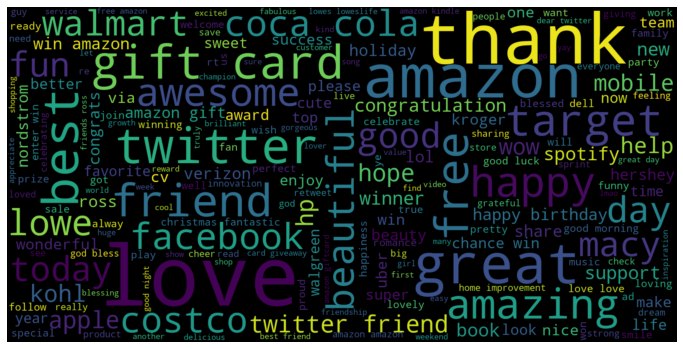

In [93]:
pos_tweets = my_df[my_df.positive_sentiment >= 0.5]
pos_string = []
pos_tweets["clean_text"] = pos_tweets["clean_text"].apply(str) 

for t in pos_tweets.clean_text:
    pos_string.append(t)


pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

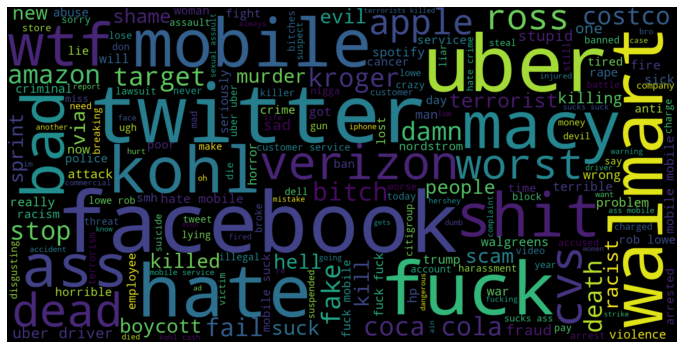

In [94]:
neg_tweets = my_df[my_df.negative_sentiment >= 0.500]
neg_string = []
neg_tweets["clean_text"] = neg_tweets["clean_text"].apply(str) 

for t in neg_tweets.clean_text:
    neg_string.append(t)

neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [95]:
for t in pos_tweets.clean_text[:200]:
    if 'love' in t:
        print (t)

relax at home with your best friends and our truist gloves shop today
muah much love twitter
love me cute beutiful new friends follow like smile happy have fun to followme on twitter socialmedia tagforlikes
happy new year my twitter family peace love
love twitter
thanks for being such amazing involved fans friends thankyou shoutout twitter moments loveourteam we love all the support love
these lovely shirts sweatshirt arrived today love artwork twitter
askjoseph thank you all for the amazing on twitter thank for trending love all
thanks twitter that is sooooo cute made me smile love it
love this art artiststowatch twitter
new twitter theme by thank you love it thanks as well for making this happen
gm fabulous friends in twitter world live laugh and love today is new beginning enjoy and cherish the moments happy wildlifewednesday
never ever thought dat would enjoy your benevolence divine love on twitter thanks lot rock star ji thtweet
big love to all my twitter friends
love me cute beut

In [96]:
#adding clean column to initial dataset
my_df.to_csv('./twitter_sentiment.csv',encoding='utf-8')

# Count Vectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.clean_text)

KeyboardInterrupt: 

In [ ]:
len(cvec.get_feature_names())


In [20]:
neg_doc_matrix = cvec.transform(my_df[my_df.negative_sentiment >= 0.500].clean_text)
pos_doc_matrix = cvec.transform(my_df[my_df.positive_sentiment >= 0.500].clean_text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

AttributeError: 'DataFrame' object has no attribute 'negative_sentiment'

In [21]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

NameError: name 'term_freq_df' is not defined

In [ ]:
term_freq_df.to_csv('./term_freq_df.csv',encoding='utf-8')